In [1]:
""" The text we will use is an Italian news article about vaccines """
file = 'sample_article.txt'

with open(file, 'r') as fr:
    text = fr.read()
    

""" Text we will use as baseline will be a similar one"""
file = 'another_text_[baseline].txt'

with open(file, 'r') as fr:
    baseline_text = fr.read()
    
print(text)

Dura invettiva del presidente della Regione Campania, Vincenzo De Luca, sul piano nazionale dei vaccini anti-covid e relativa distribuzione regionale. Nella sua consueta diretta Facebook del venerdì, il politico espone le ragioni del suo dissenso: “È un piano assolutamente squilibrato e penalizzante per la nostra regione. Le motivazioni che ci hanno dato sono inaccettabili e totalmente false. I presupposti del piano generale di distribuzione dei vaccini sono profondamente sbagliati”.
De Luca elenca alcune Regioni che, pur avendo una minore densità demografica della Campania, hanno ricevuto più dosi di vaccini, come Piemonte (170mila), Veneto (164mila), Emilia Romagna (183mila), Lombardia (304mila), a fronte dei 135mila vaccini arrivati nella regione da lui amministrata. E commenta: “Per cortesia, nessuno mi dica che stiamo rispettando criteri oggettivi. Abbiamo assistito al mercato nero dei vaccini. Lo abbiamo denunciato e abbiamo chiesto un riequilibrio che ancora non è avvenuto. Anco

In [2]:
from emotionslib import EmoScores

emos = EmoScores(language = 'italian')

""" 1. Get emotion counts """
emo_counts = emos.emotions(text)

print("1. Emotion counts from text: ")
print(emo_counts)
print()


""" 2. Get zscores against default baseline """
zscores = emos.zscores(text)

print("2. Z-scores from text (no baseline provided, fallback to default baseline):")
print(zscores)
print()


""" 3.1 Get zscores against custom baseline """
zscores = emos.zscores(text, baseline = baseline_text)

print("3.1 Z-scores from text against custom baseline:")
print(zscores)
print()


""" 3.2 Load a permanent baseline (works best for multiple files) """
# baseline same as before
emos.load_baseline(baseline_text)
zscores = emos.zscores(text)

print("3.2 Loaded a baseline and then z-scores from text (now the baseline is permanent!):")
print(zscores)
print()

""" 4. Get a formamentis network and print emotion counts """
edges, vertex = emos.formamentis_network(text)
emo_counts = emos.emotions(edges)

print("4. Get a Formamentis network from text and then emotion counts: ")
print(emo_counts)
print()


""" 5. Get a formamentis network and print z-scores """
# baseline same as before
edges, vertex = emos.formamentis_network(text)
zscores = emos.zscores(edges)

print("5. Get a Formamentis network from text and then z-scores against the loaded baseline:")
print(zscores)
print()


""" 6. Get a formamentis network about "vaccino" and print emotion counts """
edges, vertex = emos.formamentis_network(text, target_word = "vaccino")
emo_counts = emos.emotions(edges)

print("6. Get a Formamentis network with target word 'vaccino' and then emotion counts: ")
print(emo_counts)
print()


""" 7. Get a formamentis network about "vaccino" and print z-scores """
# baseline same as before
edges, vertex = emos.formamentis_network(text)
zscores = emos.zscores(edges, target_word = "vaccino")

print("7. Get a Formamentis network and get z-scores against loaded baseline, with filter on edges linked to 'vaccino':")
print(zscores)
print()


""" 8. What if we ask for the neighbors of "vaccino" without using formamentis? """
try:
    # baseline same as before
    zscores = emos.zscores(text, target_word = "vaccino")

except Exception as e:
    print("8. [text with target word?]", e)
    print()
    
    
""" 9. Loading a formamentis and asking z-scores is best when working with multiple files. 
       You can also just get emotion counts and ask to use formamentis networks as well. 
"""
# baseline same as before
zscores = emos.zscores(text, method = 'formamentis', target_word = "vaccino")

print("9. Get Z-scores from text through Formamentis, and filter the edges on 'vaccino':")
print(zscores)
print()


1. Emotion counts from text: 
{'anger': 13, 'trust': 30, 'surprise': 9, 'disgust': 6, 'joy': 11, 'sadness': 10, 'fear': 10, 'anticipation': 13}

2. Z-scores from text (no baseline provided, fallback to default baseline):
{'anger': -0.9522851268751225, 'trust': 4.154804864386931, 'surprise': 0.5117631779280652, 'disgust': -2.468675084157538, 'joy': 0.5127558828909093, 'sadness': -1.6538982659464827, 'fear': -2.8998865994251437, 'anticipation': 0.3467856686382607}

3.1 Z-scores from text against custom baseline:
{'anger': 2.3741623426314957, 'trust': -0.10497304822332047, 'surprise': 2.5834040205867477, 'disgust': 4.849247787516226, 'joy': 1.6799908875023282, 'sadness': -0.7338748373578562, 'fear': -1.8969228868514503, 'anticipation': -1.26535346750406}

3.2 Loaded a baseline and then z-scores from text (now the baseline is permanent!):
{'anger': 2.263096020825745, 'trust': 0.0027220014228145316, 'surprise': 2.262442996052715, 'disgust': 4.923388515459479, 'joy': 1.558899010403633, 'sadn

On the left, the emotion distribution in the text.
On the center, the emotion distribution in the baseline.
On the right, the difference between the two previous distributions in z-scores.


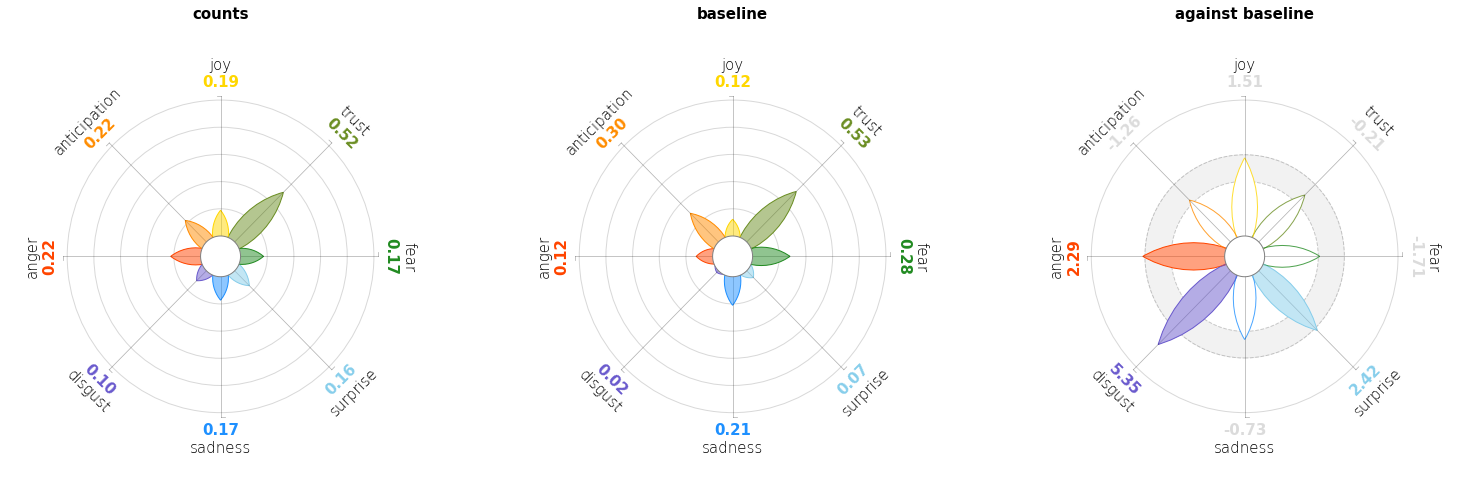

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (26, 8))

emo_counts = emos.emotions(text, normalization_strategy = 'num_emotions')
emo_baseline = emos.baseline_distribution().emotions
zscores = emos.zscores(text)


emos.draw_plutchik(emo_counts, ax = ax[0], title = 'counts')
emos.draw_plutchik(emo_baseline, ax = ax[1], title = 'baseline')
emos.draw_plutchik(zscores, reject_range = (-1.96, 1.96), rescale = (-10, 10), ax = ax[2], title = 'against baseline');

print("On the left, the emotion distribution in the text.")
print("On the center, the emotion distribution in the baseline.")
print("On the right, the difference between the two previous distributions in z-scores.")

In [4]:
emos.stats(text)

{'emotions': {'num_emotionwords': 58,
  'num_emotionwords_unique': 49,
  'perc_emotionwords': 0.08605341246290801,
  'perc_emotionwords_unique': 0.16666666666666666},
 'anger': {'num_words': 13,
  'num_words_unique': 13,
  'perc_text': 0.019287833827893175,
  'perc_text_unique': 0.04421768707482993,
  'perc_emotionwords': 0.22413793103448276,
  'perc_emotionwords_unique': 0.2653061224489796},
 'trust': {'num_words': 30,
  'num_words_unique': 23,
  'perc_text': 0.04451038575667656,
  'perc_text_unique': 0.0782312925170068,
  'perc_emotionwords': 0.5172413793103449,
  'perc_emotionwords_unique': 0.46938775510204084},
 'surprise': {'num_words': 9,
  'num_words_unique': 9,
  'perc_text': 0.013353115727002967,
  'perc_text_unique': 0.030612244897959183,
  'perc_emotionwords': 0.15517241379310345,
  'perc_emotionwords_unique': 0.1836734693877551},
 'disgust': {'num_words': 6,
  'num_words_unique': 6,
  'perc_text': 0.008902077151335312,
  'perc_text_unique': 0.02040816326530612,
  'perc_emot